In [78]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, models, layers

In [79]:
(imageDataTrain, imageLabelsTrain), (imageDataTest, imageLabelsTest) = datasets.cifar10.load_data()

CLASS_LIST = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# print(imageDataTrain[0:3], imageDataTrain.shape)
# print(imageLabelsTrain[0:3], imageLabelsTrain.shape)

In [96]:
imageLabelsTrain = imageLabelsTrain.flatten()
imageLabelsTest = imageLabelsTest.flatten()

In [81]:
def plot_image(imageData, imageLabel, index):
    """
    the function outputs the imageData as a 2D 32x32 image along with its class as a label
    
    parameters
    ----
    imageData: ndarray
    imageLabel: ndarray
    index: int
    
    returns
    ----
    NoneType
    
    """
    plt.imshow(imageData[index])
    plt.xlabel(CLASS_LIST[imageLabel[index]])

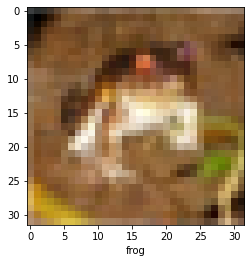

In [98]:
plot_image(imageDataTrain, imageLabelsTrain, 0)

In [83]:
# normalizing the data so each number is a decimal between 0 and 1

imageDataTrain = imageDataTrain / 255
imageDataTest = imageDataTest / 255

In [88]:
neuralNetwork = models.Sequential([
    
    # creating the convolutional layers which takes as input, tensors of shape (32, 32, 3)
    # after the first layer, we don't specify the shape as it auto-fits
    
    layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = (32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'),
    
    # finally we add the dense layers to classify the images
    # since dense layers only take 1D tensors as input, we first flatten it
    # since we have 10 classes, we have a final dense layer with 10 outputs
    
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10)
])

neuralNetwork.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_16 (Flatten)        (None, 1024)            

In [89]:
neuralNetwork.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])

history = neuralNetwork.fit(imageDataTrain, imageLabelsTrain, epochs = 15, validation_data=(imageDataTest, imageLabelsTest))

Epoch 1/15
1563/1563 [==============================] - 33s 21ms/step - loss: 1.5040 - accuracy: 0.4507 - val_loss: 1.2822 - val_accuracy: 0.5397
Epoch 2/15
1563/1563 [==============================] - 32s 21ms/step - loss: 1.1489 - accuracy: 0.5961 - val_loss: 1.1270 - val_accuracy: 0.5955
Epoch 3/15
1563/1563 [==============================] - 33s 21ms/step - loss: 1.0044 - accuracy: 0.6468 - val_loss: 0.9684 - val_accuracy: 0.6615
Epoch 4/15
1563/1563 [==============================] - 32s 21ms/step - loss: 0.8974 - accuracy: 0.6851 - val_loss: 0.9499 - val_accuracy: 0.6714
Epoch 5/15
1563/1563 [==============================] - 31s 20ms/step - loss: 0.8203 - accuracy: 0.7131 - val_loss: 0.8956 - val_accuracy: 0.6942
Epoch 6/15
1563/1563 [==============================] - 36s 23ms/step - loss: 0.7601 - accuracy: 0.7342 - val_loss: 0.8593 - val_accuracy: 0.7027
Epoch 7/15
1563/1563 [==============================] - 34s 22ms/step - loss: 0.7132 - accuracy: 0.7503 - val_loss: 0.8735 -

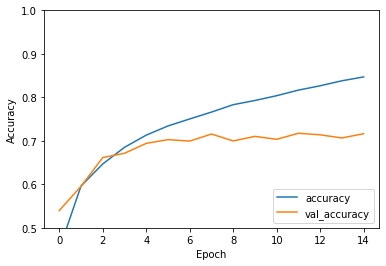

In [90]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

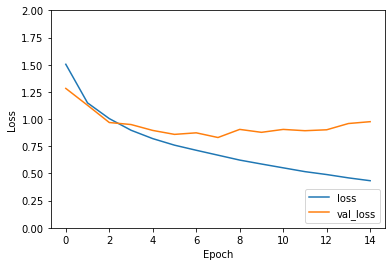

In [99]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 2])
plt.legend(loc='lower right')

In [102]:
test_loss, test_acc = neuralNetwork.evaluate(imageDataTest,  imageLabelsTest, verbose=2)

313/313 - 2s - loss: 0.9761 - accuracy: 0.7164 - 2s/epoch - 6ms/step
